In [1]:
import pandas as pd
import torch

In [4]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x):
    return 3*x**2-4*x

In [6]:
def numerical_lin(f,x,h):
    return (f(x+h)-f(x))/h

h=0.1
for i in range(5):
    print(f'h={h:.5f},numerical limit={numerical_lin(f,1,h):.5f}')
    h*=0.1

h=0.10000,numerical limit=2.30000
h=0.01000,numerical limit=2.03000
h=0.00100,numerical limit=2.00300
h=0.00010,numerical limit=2.00030
h=0.00001,numerical limit=2.00003


In [12]:
def use_svg_display():
    backend_inline.set_matplotlib_formats('svg')

In [8]:
def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    d2l.plt.rcParams['figure.figsize']=figsize

In [9]:
def set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
        axes.grid()

In [10]:
def plot(X,Y=None,xlabel=None,ylabel=None,legend=None,xlim=None,
         ylim=None,xscale='linear',yscale='linear',
         fmts=('-','m--','g-','r:'),figsize=(3.5,2.5),axes=None):
    if legend is None:
        legend=[]
    
    set_figsize(figsize)
    axes=axes if axes else d2l.plt.gca()
    
    def has_one_axis(X):
        return (hasattr(X,"ndim") and X.ndim==1 or isinstance(X,list)
                and not hasattr(X[0],"__len__"))
    
    if has_one_axis(X):
        X=[X]
    if Y is None:
        X,Y=[[]]*len(X),X
    elif has_one_axis(Y):
        Y=[Y]
    if len(X)!=len(Y):
        X=X*len(Y)
    axes.cla()
    for x,y,fmt in zip(X,Y,fmts):
        if len(x):
            axes.plot(x,y,fmt)
        else:
            axes.plot(y,fmt)
    set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend)

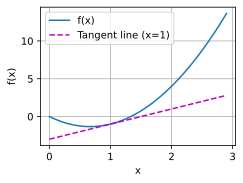

In [13]:
x=np.arange(0,3,0.1)
plot(x,[f(x),2*x-3],'x','f(x)',legend=['f(x)','Tangent line (x=1)'])

In [15]:
x=torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [17]:
x.requires_grad_(True)
x.grad

In [18]:
y=2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [19]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [23]:
x.grad==4*x

tensor([True, True, True, True])

In [24]:
x.grad.zero_()
y=x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [25]:
x.grad.zero_()
y=x*x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [26]:
def f(a):
    b=a*2
    while b.norm() < 1000:
        b=b*2
    if b.sum()>0:
        c=b
    else:
        c=100*b
    return c
        

In [27]:
a=torch.randn(size=(),requires_grad=True)
d=f(a)
d.backward()

In [28]:
a

tensor(-0.5626, requires_grad=True)

In [31]:
from torch.distributions import multinomial
fair_probs=torch.ones([6])/6

In [35]:
multinomial.Multinomial(1,fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [36]:
multinomial.Multinomial(20,fair_probs).sample()

tensor([4., 4., 4., 4., 2., 2.])

In [38]:
counts=multinomial.Multinomial(10000,fair_probs).sample()
counts/10000

tensor([0.1708, 0.1641, 0.1649, 0.1654, 0.1659, 0.1689])

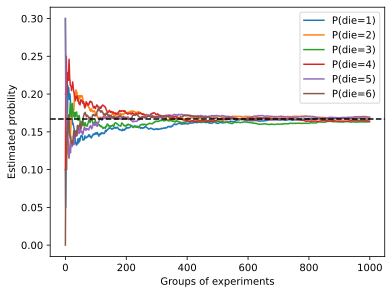

In [44]:
counts=multinomial.Multinomial(10,fair_probs).sample((1000,))
cum_counts=counts.cumsum(dim=0)
esitmates=cum_counts/cum_counts.sum(dim=1,keepdims=True)

d2l.set_figsize((6,4.5))
for i in range(6):
    d2l.plt.plot(esitmates[:,i].numpy(), label=("P(die="+str(i+1)+")"))
d2l.plt.axhline(y=0.167,color='black',linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probility')
d2l.plt.legend()

In [45]:
import math
import time

In [49]:
n=1000
a=torch.ones([n])
b=torch.ones([n])

In [46]:
class Timer:
    def __init__(self):
        self.times=[]
        self.start()
        
    def start(self):
        self.tik=time.time()
        
    def stop(self):
        self.times.append(time.time()-self.tik)
        return self.times[-1]
    
    def avg(self):
        return sum(self.times)/len(self.times)
    
    def sum(self):
        return sum(self.times)
    
    def cumsum(self):
        return np.array(self.times).cumsum().tolist

In [50]:
n
c=torch.zeros(n)
timer=Timer()
for i in range(n):
    c[i]=a[i]+b[i]
f'{timer.stop():.5f}sec'

'0.00891sec'

In [51]:
timer.start()
d=a+b
f'{timer.stop():.5f}sec'

'0.00000sec'

In [52]:
def normal(x,mu,sigma):
    p=1/(math.sqrt(2*math.pi*sigma**2))
    return p*np.exp(-0.5/sigma**2*(x-mu)**2)

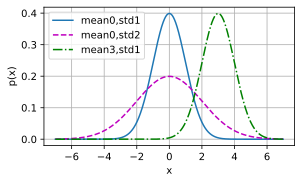

In [53]:
x=np.arange(-7,7,0.01)
params=[(0,1),(0,2),(3,1)]
d2l.plot(x,[normal(x,mu,sigma) for mu,sigma in params], xlabel='x',
         ylabel='p(x)',figsize=(4.5,2.5),
         legend=[f'mean{mu},std{sigma}' for mu,sigma in params])